# Problem 1
## Overview
We have been provided with data from a comprehensive survey conducted by CNBE, a prominent news channel, to deliver insightful coverage of recent elections. The survey captures perspectives from 1525 voters across various demographic and socio-economic factors. The dataset contains 9 variables, providing a rich source of information about voters' characteristics and preferences. The task is to use this dataset to analyse and derive insights into voter behaviour and trends.
## Objective
Using the data provided, we will perform the following steps to build a predictive model for forecasting which political party a voter is likely to support:
1.	Define the problem
2.	Explore the data
3.	Get the statistical summary of the data
4.	Perform data preprocessing
5.	Apply machine learning algorithms (such as Naive Bayes and KNN)
6.	Perform ensemble techniques (Random Forest, Bagging, Boosting)
7.	Compare the models
8.	Derive actionable insights and recommendations

## Dataset Description
This is the Definition of the data provided in the below table:
|Variable |	Description	| Scale/Values |
| --- | --- | --- |
|vote |	Party choice |Conservative or Labour
|age| Age in years |Numeric
|economic.cond.national |Assessment of current national economic conditions |	1 to 5
|economic.cond.household |Assessment of current household economic conditions |	1 to 5
|Blair | Assessment of the Labour leader |1 to 5
|Hague | Assessment of the Conservative leader |1 to 5
|Europe| An 11-point scale that measures respondents' attitudes toward European integration |0 to 10 (Higher scores indicate ‘Eurosceptic’ sentiment)
|political.knowledge |	Knowledge of parties' positions on European integration | 0 to 3
|gender |Gender | Female or Male

## Questions Asked
### Define the problem and perform Exploratory Data Analysis.
#### Problem definition
We have been provided with data from a comprehensive survey conducted by CNBE, a prominent news channel, to deliver insightful coverage of recent elections. The survey captures perspectives from 1525 voters across various demographic and socio-economic factors. The dataset contains 9 variables, providing a rich source of information about voters' characteristics and preferences. The task is to use this dataset to analyse and derive insights into voter behaviour and trends, to do this we will apply KNN, Naïve Bayes, Bagging and Boosting techniques to build a predictive model.
#### Check Shape, Data Types, Statistical Summary
- The Data has 1525 observations and 8 independent features/attributes and 1 dependant attribute
- The Data has 7 features with data type : int64, 2 features with data type : object.
- "vote" and “gender”  is of data type "object", we need to check this for values counts and convert to int or float.
- There are 8 duplicated rows with the exact values, we will remove duplicates and keep the “First” records.
- The Data has 1517 observations post duplicates removal.
- No "Null" or missing values are seen in the dataset
- All the features are category except age, we change everything to category, except Age
    - Statistical Summary:
        - Age has a minimum from 24 to a max of 93 with median of 53.
        - Vote has 2 unique values with Labour being aroud ~2/3 the values.
        - Economic.cond.national has a mode of 3 with around 1/3rd the values.
        - Economic.cond.household has a mode 3 with around 1/3rd the values.
        - Blair has a higher rating as a mode with 4 compared to 2 for Hauge, with around ½ of the values compared to 1/3rd of the values respectively.
        - Political knowledge is low with 1/3rd of the value being 2.
        - Gender mix is fairly even with around ½ being female.
- We will convert the age too to bins are then the data across could be Categorical.
    - For binning we would use the “Freedman-Diaconis Rule”:
        - H number of bins = 2 multiplied by interquartile range / cube root of number of observations 


In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
work_path = './data/'
images_path = './images/'
input_file = 'Election_Data.xlsx'
input_url = work_path+input_file

In [2]:
!pip install openpyxl

In [3]:
import warnings
warnings.filterwarnings("ignore")
import openpyxl as xl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV

In [4]:
election_data = pd.read_excel(input_url,sheet_name='Election_Dataset_Two Classes')

##### Check Shape

In [5]:
election_data.head()
election_data.drop(columns='Unnamed: 0', inplace=True)
election_data.head()
election_data.shape


(1525, 9)

In [6]:
election_data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male


##### Check Data Types

In [7]:
election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
for col in election_data.columns:
    if col != 'age':
        election_data[col] = election_data[col].astype('category')

election_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   vote                     1525 non-null   category
 1   age                      1525 non-null   int64   
 2   economic.cond.national   1525 non-null   category
 3   economic.cond.household  1525 non-null   category
 4   Blair                    1525 non-null   category
 5   Hague                    1525 non-null   category
 6   Europe                   1525 non-null   category
 7   political.knowledge      1525 non-null   category
 8   gender                   1525 non-null   category
dtypes: category(8), int64(1)
memory usage: 25.6 KB


##### Check Duplicates

In [9]:
election_data.duplicated().sum()

8

In [10]:
election_data[election_data.duplicated()]

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [11]:
first_duplicated_rows = election_data[election_data.duplicated(keep='first')]
first_duplicated_rows

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
67,Labour,35,4,4,5,2,3,2,male
626,Labour,39,3,4,4,2,5,2,male
870,Labour,38,2,4,2,2,4,3,male
983,Conservative,74,4,3,2,4,8,2,female
1154,Conservative,53,3,4,2,2,6,0,female
1236,Labour,36,3,3,2,2,6,2,female
1244,Labour,29,4,4,4,2,2,2,female
1438,Labour,40,4,3,4,2,2,2,male


In [12]:
last_duplicated_rows = election_data[election_data.duplicated(keep='last')]
last_duplicated_rows

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
2,Labour,35,4,4,5,2,3,2,male
86,Conservative,53,3,4,2,2,6,0,female
333,Labour,38,2,4,2,2,4,3,male
390,Labour,39,3,4,4,2,5,2,male
577,Conservative,74,4,3,2,4,8,2,female
916,Labour,29,4,4,4,2,2,2,female
1037,Labour,40,4,3,4,2,2,2,male
1209,Labour,36,3,3,2,2,6,2,female


In [13]:
election_data.drop_duplicates(inplace=True,keep='first')

In [14]:
election_data.shape

(1517, 9)

##### Data Summary

In [15]:
election_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
vote,1517,2,Labour,1057,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,1517.0,NaN,NaN,NaN,54.241266,15.701741,24.0,41.0,53.0,67.0,93.0
economic.cond.national,1517.0,5.0,3.0,604.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
economic.cond.household,1517.0,5.0,3.0,645.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Blair,1517.0,5.0,4.0,833.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Hague,1517.0,5.0,2.0,617.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Europe,1517.0,11.0,11.0,338.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
political.knowledge,1517.0,4.0,2.0,776.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,1517,2,female,808,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Binning Age

In [16]:
iqr = election_data['age'].quantile(0.75) - election_data['age'].quantile(0.25)
n = len(election_data)
bin_width_fd = 2 * iqr / np.cbrt(n)
int(bin_width_fd)

4

In [17]:
bin_width_fd = 5

# Calculate bin edges to ensure inclusion of minimum value
min_age = election_data['age'].min()
max_age = election_data['age'].max()
bins = np.arange(min_age-1, max_age + bin_width_fd + 1, bin_width_fd)

# Create age_bin column using pd.cut()
election_data['age_bin'] = pd.cut(election_data['age'], bins=bins)
election_data.head()

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,Labour,43,3,3,4,1,2,2,female,"(38, 43]"
1,Labour,36,4,4,4,4,5,2,male,"(33, 38]"
2,Labour,35,4,4,5,2,3,2,male,"(33, 38]"
3,Labour,24,4,2,2,1,4,0,female,"(23, 28]"
4,Labour,41,2,2,1,1,6,2,male,"(38, 43]"


In [18]:
election_data_binned = election_data.copy()
election_data_binned.drop(columns='age', inplace=True)
election_data_binned.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,Labour,3,3,4,1,2,2,female,"(38, 43]"
1,Labour,4,4,4,4,5,2,male,"(33, 38]"
2,Labour,4,4,5,2,3,2,male,"(33, 38]"
3,Labour,4,2,2,1,4,0,female,"(23, 28]"
4,Labour,2,2,1,1,6,2,male,"(38, 43]"


##### Data Summary all Categorical

In [19]:
election_data_binned.describe().T

,count,unique,top,freq
vote,1517,2,Labour,1057
economic.cond.national,1517,5,3,604
economic.cond.household,1517,5,3,645
Blair,1517,5,4,833
Hague,1517,5,2,617
Europe,1517,11,11,338
political.knowledge,1517,4,2,776
gender,1517,2,female,808
age_bin,1517,14,"(33, 38]",163


#### Univariate analysis - Multivariate analysis
##### We perform “Univariate” Analysis on the all the categorical  variables by plotting Count plots.
###### Count plots observations
-	2/3rd of the data prefers Labour party, vs 1/3rd for Conservative.
-	Economic condition national and household, eco each other with most of the respondent neutral or  scoring 3 out of the 5-scale rating.
-	Blair does not have any neutrals and Hague too, so this data is for the most case good as there is a distinction between will vote and won’t vote.
-	Europe and political knowledge are at a different scale than the other scoring features which are between 0-5.
-	 The distribution of observations between male and female seems to be close to equal with “females” being slightly higher.
-	The distribution of the data for the age bin seems to be close to right skewed normal distribution with three  nodes.

##### Univariate analysis

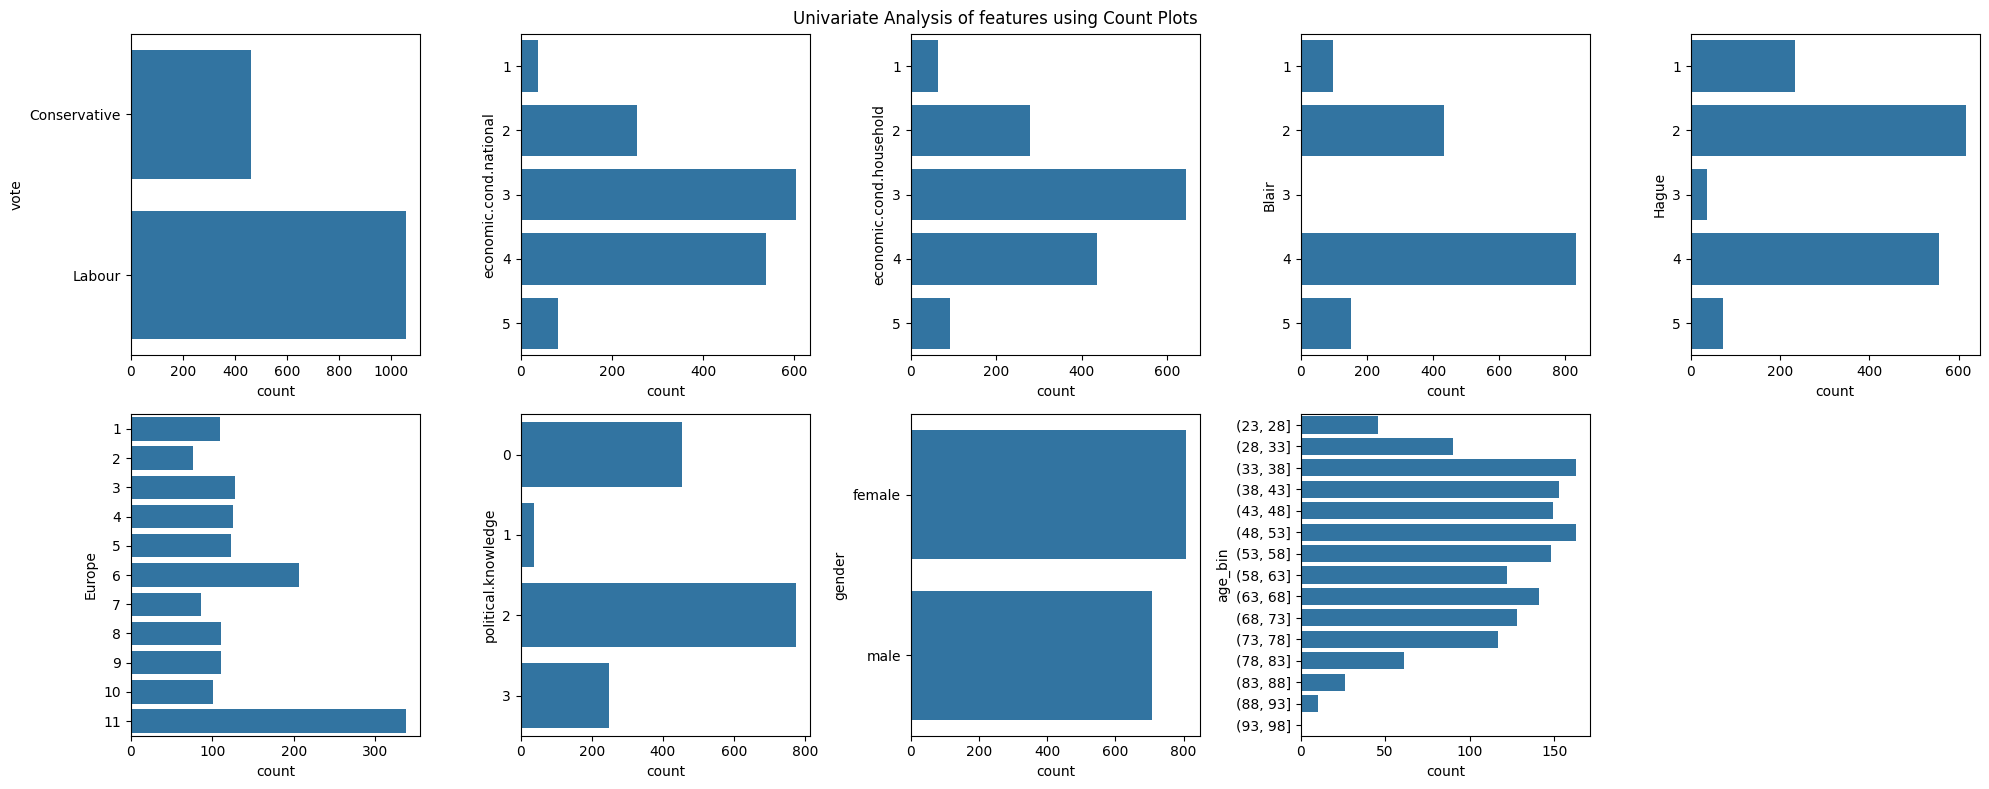

In [20]:
n = len(election_data_binned.columns)
ncols = 5
nrows = n//nclos if n % ncols == 0 else n//ncols + 1

fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20,4*nrows))
axs = np.ravel(axs)
for idx in range(nrows * ncols):
    ax = axs[idx]  # get the current axis
    if idx < n:
        sns.countplot(election_data_binned[election_data_binned.columns[idx]], ax=ax)
    else:
        fig.delaxes(ax)
fig.suptitle('Univariate Analysis of features using Count Plots')
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig(images_path+'countplots.svg')
plt.show()

##### We perform “Multivariate” Analysis: Using a Count plots with the Hue of the dependant feature vote  for all the categorical variables.
###### Key Observations
- A lot of conservative voters think the national and household economic condition is bad or neutral, compared to the labour voters.
- More labour voters for Blair is good compared to Hauge.
- A good part of the Labour voters are not Eurosceptics as compared to the conservative votes
    - Also, a good number both from the labour and conservative camp are highly Euro sceptical.
- The labour voters seem to be more politically knowledgeable when compared to the conservative voters.
- The gender mix seems to be the same across the conservative and the labour voters.
- In the age mix there seems to be a majority of labour voters in the ages below 60 and above 75 for the most part and in all age groups the Labour voters are higher than the conservatives.



##### MultiVariate analysis

In [21]:
independant_features_cols =[]
for col in election_data_binned.columns:
    if col != 'vote':
        independant_features_cols.append(col)
    else :
        dependant_feature = col

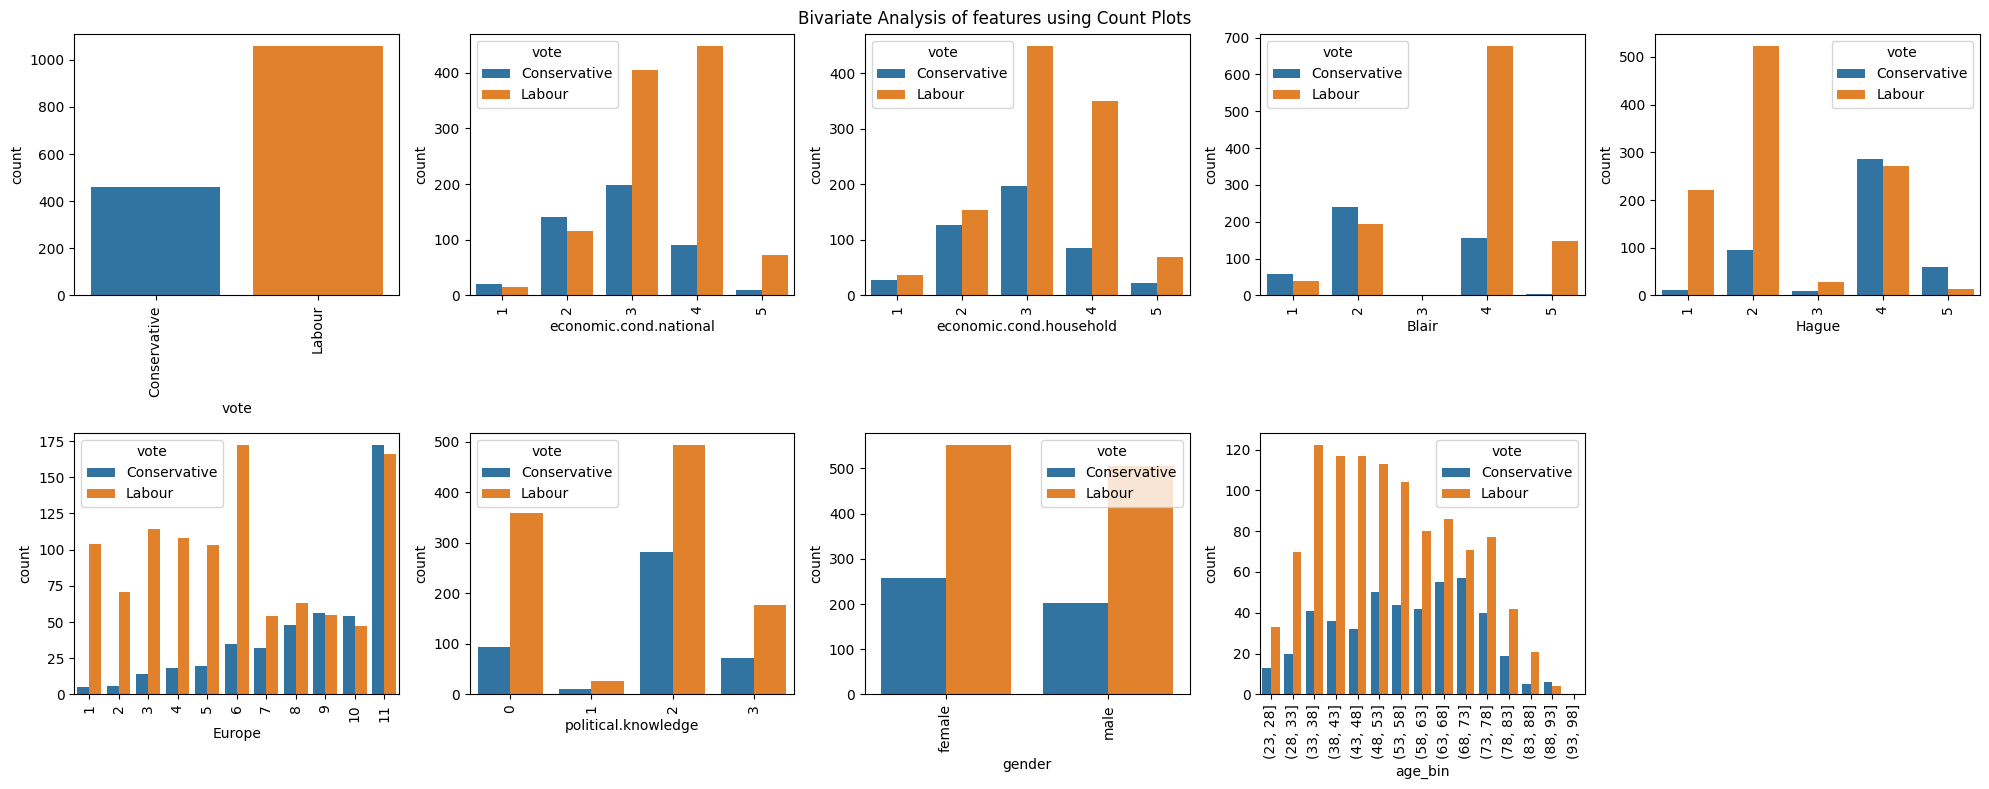

In [22]:
n = len(election_data_binned.columns)
ncols = 5
nrows = n//nclos if n % ncols == 0 else n//ncols + 1

fig, axs = plt.subplots(nrows = nrows, ncols = ncols, figsize=(20,4*nrows))
axs = np.ravel(axs)
for idx in range(nrows * ncols):
    ax = axs[idx]  # get the current axis
    if idx < n:
        sns.countplot(data= election_data_binned,x=election_data_binned[election_data_binned.columns[idx]], hue=dependant_feature,ax=ax)
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    else:
        fig.delaxes(ax)
fig.suptitle('Bivariate Analysis of features using Count Plots')
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig(images_path+'Hue_countplots.svg')
plt.show()

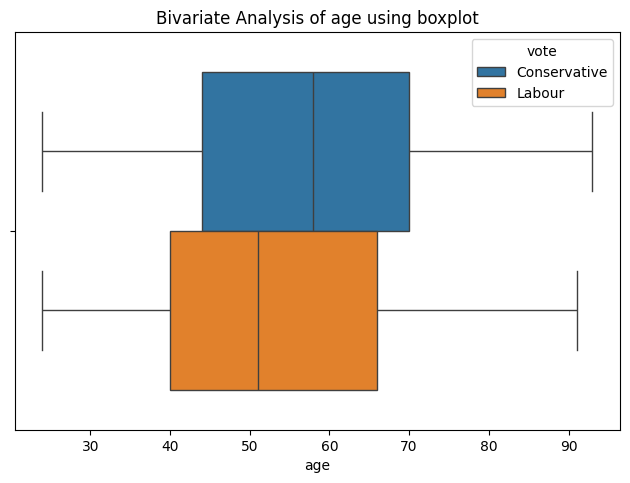

In [23]:
sns.boxplot(election_data, x= election_data['age'], hue=election_data['vote'])
plt.title('Bivariate Analysis of age using boxplot')
plt.subplots_adjust(top=1)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.savefig(images_path+'age_boxplots.svg')
plt.show()

### Data Pre-Processing.
#### Prepare data for modelling:
##### Missing Values Treatment:
- There were no missing values, There were 8 duplicates, we removed the duplicates.
##### Outlier Detection (treat, if needed):
- There are no Outliers and nothing to treat for the same


##### Encoding
-	We will encode Vote, gender and age bin.
-	We will use Label encoding for Vote
    - {'Labour': 0, 'Conservative': 1}
-	We will use Label encoding for gender
    - {'female': 0, 'male': 1}
-	We will use one hot encoding for “age_bin”
    - This will increase the dimensions but we do not want to do label encoding to give the picture are there is some sort of order or ranking.


In [24]:
election_data_processed = election_data_binned.copy()
election_data_processed.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,Labour,3,3,4,1,2,2,female,"(38, 43]"
1,Labour,4,4,4,4,5,2,male,"(33, 38]"
2,Labour,4,4,5,2,3,2,male,"(33, 38]"
3,Labour,4,2,2,1,4,0,female,"(23, 28]"
4,Labour,2,2,1,1,6,2,male,"(38, 43]"


In [25]:
mapping = {'Labour': 0, 'Conservative': 1}
election_data_processed['vote'] = election_data_processed['vote'].cat.rename_categories(mapping)
mapping = {'female': 0, 'male': 1}
election_data_processed['gender'] = election_data_processed['gender'].cat.rename_categories(mapping)

In [26]:
election_data_processed.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,age_bin
0,0,3,3,4,1,2,2,0,"(38, 43]"
1,0,4,4,4,4,5,2,1,"(33, 38]"
2,0,4,4,5,2,3,2,1,"(33, 38]"
3,0,4,2,2,1,4,0,0,"(23, 28]"
4,0,2,2,1,1,6,2,1,"(38, 43]"


In [27]:
age_bin_encoded = pd.get_dummies(election_data_processed['age_bin'], prefix='age_bin', drop_first=True)

# Replace values in age_bin_encoded based on your mapping dictionary
mapping = {True: 1, False: 0}  # Adjust this mapping as per your requirement
age_bin_encoded.replace(mapping, inplace=True)

# Display the updated DataFrame
print("Updated age_bin_encoded DataFrame:")
age_bin_encoded.head()

Updated age_bin_encoded DataFrame:


,"age_bin_(28, 33]","age_bin_(33, 38]","age_bin_(38, 43]","age_bin_(43, 48]","age_bin_(48, 53]","age_bin_(53, 58]","age_bin_(58, 63]","age_bin_(63, 68]","age_bin_(68, 73]","age_bin_(73, 78]","age_bin_(78, 83]","age_bin_(83, 88]","age_bin_(88, 93]","age_bin_(93, 98]"
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [28]:
election_data_processed = pd.concat([election_data_processed, age_bin_encoded], axis=1)
election_data_processed.head()
election_data_processed.drop(columns='age_bin',inplace = True)
election_data_processed.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,"age_bin_(28, 33]","age_bin_(33, 38]",...,"age_bin_(48, 53]","age_bin_(53, 58]","age_bin_(58, 63]","age_bin_(63, 68]","age_bin_(68, 73]","age_bin_(73, 78]","age_bin_(78, 83]","age_bin_(83, 88]","age_bin_(88, 93]","age_bin_(93, 98]"
0,0,3,3,4,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,4,4,4,5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,4,4,5,2,3,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,2,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,2,1,1,6,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
election_data_processed.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,"age_bin_(28, 33]","age_bin_(33, 38]",...,"age_bin_(48, 53]","age_bin_(53, 58]","age_bin_(58, 63]","age_bin_(63, 68]","age_bin_(68, 73]","age_bin_(73, 78]","age_bin_(78, 83]","age_bin_(83, 88]","age_bin_(88, 93]","age_bin_(93, 98]"
0,0,3,3,4,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,4,4,4,5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,4,4,5,2,3,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,2,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,2,1,1,6,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Data Split
- We split the data into X(Containing all the Features) and y containging the Dependant variable.
- We split the data into Train and Test, with 70% records in Train and 30% in Test
    - We have 1061 observations in Train and 456 in Test


In [30]:
X = election_data_processed.drop(columns='vote',axis=1)
y = election_data_processed['vote']
X.head()
y.head()

0    0
1    0
2    0
3    0
4    0
Name: vote, dtype: category
Categories (2, int64): [1, 0]

In [31]:
election_data_processed.head()

,vote,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,"age_bin_(28, 33]","age_bin_(33, 38]",...,"age_bin_(48, 53]","age_bin_(53, 58]","age_bin_(58, 63]","age_bin_(63, 68]","age_bin_(68, 73]","age_bin_(73, 78]","age_bin_(78, 83]","age_bin_(83, 88]","age_bin_(88, 93]","age_bin_(93, 98]"
0,0,3,3,4,1,2,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,4,4,4,4,5,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,4,4,5,2,3,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,4,2,2,1,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2,2,1,1,6,2,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1061, 21)
(456, 21)
(1061,)
(456,)


##### Scale Data
- We will not scale, vote, gender and one hot encoded age_bins as these are pure categorical with no order or ranking.
- We will scale economic.cond national and household, Blair, Europe, and political.knowledge, as these are rated questions in the survey which have order and rank in the answer, so we would want all of these on the same scale.
    - We will use max min scaling are these series do not follow a Gaussian or normal distribution.
- We use the MinMaxScaler and fit and transform the same for the training data. And use the same scale the transform the test data.
- We do not scale the dependant variable.


In [33]:
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
mms = MinMaxScaler()
scale_cols = ['economic.cond.national','economic.cond.household','Blair','Hague','Europe','political.knowledge']
X_train_scaled[scale_cols] = mms.fit_transform(X_train_scaled[scale_cols])
X_train_scaled.head()
X_test_scaled[scale_cols] = mms.transform(X_test_scaled[scale_cols])
X_test_scaled.head()

,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender,"age_bin_(28, 33]","age_bin_(33, 38]","age_bin_(38, 43]",...,"age_bin_(48, 53]","age_bin_(53, 58]","age_bin_(58, 63]","age_bin_(63, 68]","age_bin_(68, 73]","age_bin_(73, 78]","age_bin_(78, 83]","age_bin_(83, 88]","age_bin_(88, 93]","age_bin_(93, 98]"
726,0.25,0.25,0.75,0.25,0.8,0.000000,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
814,0.50,0.50,0.75,0.00,0.1,1.000000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1474,0.75,0.50,0.25,0.75,0.7,0.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1477,0.75,0.25,0.25,0.00,0.2,0.666667,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
51,0.25,0.50,0.75,0.75,0.8,0.000000,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Model Building
#### Metrics of Choice
- To evaluate between models:
    - Since we are looking to build mulitiple Classification Models
    - One of the best metrics to evaluate between Classification Models what is the AUC(Area under the Curve) captured by each model in the polt of the roc_auc_curve.
    - The Higher the AUC of a model the better it does in discriminating/spliting the classes of the base data.
    - We do not look at "Accuracy Score" of the models and compare them with each out as a model may have a high accuracy sorce but a poorer performance on recall/prescion/f1, for one class of the dataset.
- To evaluate between similar shortlisted models of compariable AUC(Area under the Curve) Score:
    - when we have two of more models of similar AUC(Area under the Curve) Score, we then look at the following:
        - Compare the f1 score on both the classes to see which model is doing better both for the training and Test data.
        - Compare the precision and recall on both the classes to see which model is doing better both for the training and Test data.
        - How well the models generalise to the test data, so we should calculate the accuracy scores on the Test data and compare.

#### Building the Models (KNN, Naive Bayes, Bagging, Boosting)
- Create the Models
    - We create the KNN and Naive Bayes models using the KNeighborsClassifier and GaussianNB methods.
    - For the Bagging and Boosting we choose the same number of estimators as "100"  and random state as "42" to be able to compare across these models
    - We create the Bagging model using the BaggingClassifier method
    - We create two models for Boosting one using the AdaBoostClassifier and other using the GradientBoostingClassifier

In [34]:
classification_models_list = []

CLM_KNN =KNeighborsClassifier()
classification_models_list.append(CLM_KNN)

CLM_NB = GaussianNB()
classification_models_list.append(CLM_NB)

CLM_BC = BaggingClassifier(n_estimators=100, random_state=42)
classification_models_list.append(CLM_BC)

CLM_ABC = AdaBoostClassifier(n_estimators=100, random_state=42)
classification_models_list.append(CLM_ABC)

CLM_GBC = GradientBoostingClassifier(n_estimators = 100,random_state=42)
classification_models_list.append(CLM_GBC)

### Model Performance evaluation
#### Check the confusion matrix and classification metrics for all the models (for both train and test dataset)
- KNeighborsClassifier
    - Training
        - f1 score of 0.89 and 0.76 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.88 and 0.78 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.90 and 0.74 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.85.
    - Test
        - f1 score of 0.88 and 0.66 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.87 and 0.69 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.89 and 0.66 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.82.
- GaussianNB
    - Training
        - f1 score of 0.86 and 0.68 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.84 and 0.72 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.88 and 0.64 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.81.
    - Test
        - f1 score of 0.86 and 0.58 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.84 and 0.62 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.88 and 0.54 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.79.
- BaggingClassifier
    - Training
        - f1 score of 1.00 and 1.00 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 1.00 and 0.99 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 1.00 and 1.00 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 1.00.
    - Test
        - f1 score of 0.88 and 0.65 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.86 and 0.69 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.90 and 0.62 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.82.
- AdaBoostClassifier
    - Training
        - f1 score of 0.88 and 0.73 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.87 and 0.76 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.90 and 0.70 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.84.
    - Test
        - f1 score of 0.89 and 0.69 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.87 and 0.73 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.91 and 0.66 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.84.
- GradientBoostingClassifier
    - Training
        - f1 score of 0.92 and 0.81 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.90 and 0.85 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.94 and 0.78 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.89.
    - Test
        - f1 score of 0.89 and 0.69 on class of 0(Labour) and class of 1 (Conservative) respectively
        - Precision of 0.88 and 0.74 on class of 0(Labour) and class of 1 (Conservative) respectively, lesser FP for class 0
        - Recall of 0.91 and 0.66 class of 0(Labour) and class of 1 (Conservative) respectively, lesser FN for class 0
        - overall accuracy 0.84.
#### ROC-AUC score and plot the curve
ROC-AUC score:
- KNeighborsClassifier : 0.83
- GaussianNB : 0.84
- BaggingClassifier : 0.85 
- AdaBoostClassifier : 0.89
- GradientBoostingClassifier : 0.89

#### All the model performance
- KNeighborsClassifier :
    - In Training
        - Does better in F1 and Precision and Recall Score for both classes than GaussianNB and AdaBoostClassifier
    - On Test Data
        - Does better in F1 and Precision and Recall Score for both classes than GaussianNB and BaggingClassifier
        - ROC - AUC Score is the least among all the Models.
- GaussianNB :
    - In Training
        - Does badly in all the metrics all the other Models
    - On Test Data
        - Does badly in all the metrics all the other Models
        - ROC - AUC Score is the only better than KNeighborsClassifier 
- BaggingClassifier :
    - In Training
        - Over fits the data with all metrics very close to or equal to 1
    - On Test Data
        - Does better in F1 and Precision and Recall Score for both classes than GaussianNB 
        - ROC - AUC Score isbetter than KNeighborsClassifier and GaussianNB
- AdaBoostClassifier :
    - In Training
        - Does better in F1 and Precision and Recall Score for both classes than GaussianNB 
    - On Test Data
        - Does better in F1 and Precision and Recall Score for both classes against all models except  GradientBoostingClassifier
        - ROC - AUC Score isbetter than all models except  GradientBoostingClassifier
- GradientBoostingClassifier :
    - In Training
        - Does better in F1 and Precision and Recall Score for both classes against all models except BaggingClassifier
    - On Test Data 
        - Does better in F1 and Precision and Recall Score for both classes against all models.
        - ROC - AUC Score is better than all models.



Model Name: KNeighborsClassifier
Training Data Summary:

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.90      0.89       726
           1       0.78      0.74      0.76       335

    accuracy                           0.85      1061
   macro avg       0.83      0.82      0.83      1061
weighted avg       0.85      0.85      0.85      1061


Confusion Matrix:
               Labour  Conservative
Labour           655            71
Conservative      87           248
--------------------------------------------------
Test Data Summary:

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       331
           1       0.69      0.63      0.66       125

    accuracy                           0.82       456
   macro avg       0.78      0.76      0.77       456
weighted avg       0.82      0.82      0.82       456


Confusion Matrix:
               Labour  Con

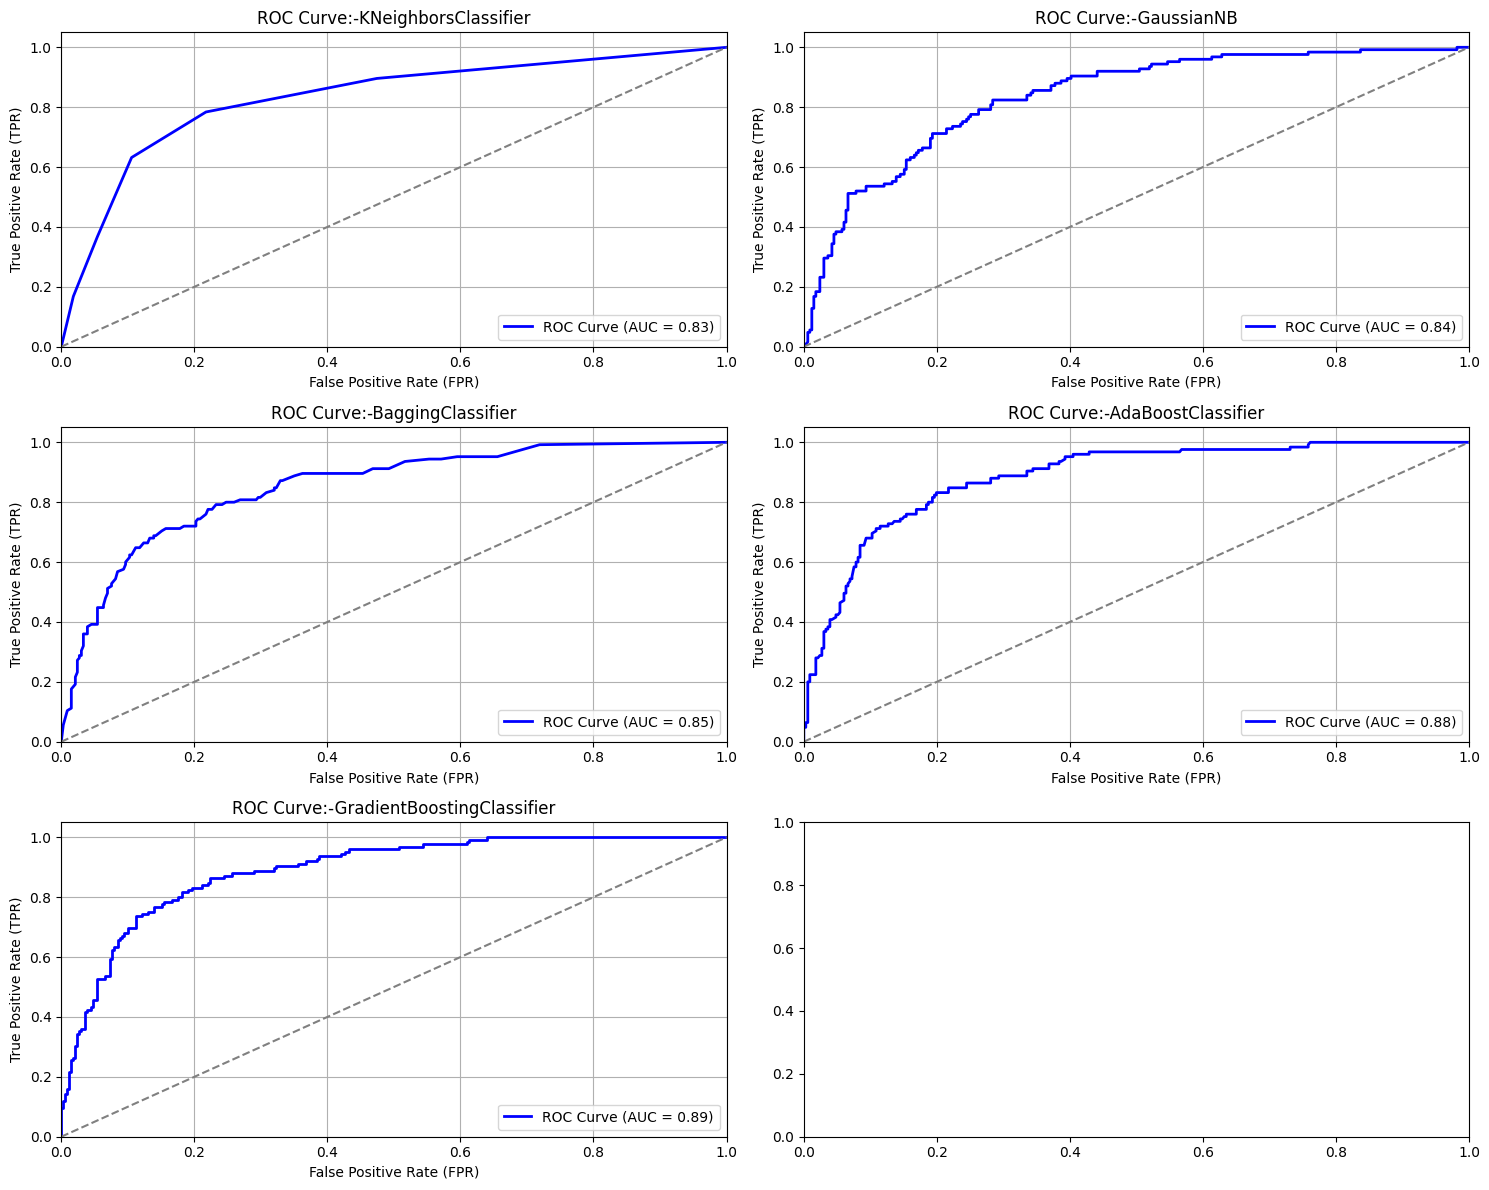

In [35]:
def get_roc_plots(model, training_data,training_results,testing_data, testing_results, ax=None):
    model.fit(training_data,training_results)
    model_name = type(model).__name__

    # Example data (replace with your actual data)
    y_true = testing_results  # True labels (binary: 0 = negative class, 1 = positive class)
    y_pred_prob = model.predict_proba(testing_data)[:, 1] # Predicted probabilities for positive classs


    # # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(y_true, y_pred_prob)

    if ax is None:
        fig, ax = plt.subplots(figsize=(8, 6))

    # Plot ROC curve
    ax.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line: random classifier
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.set_title(f'ROC Curve:-{model_name}')
    ax.legend(loc='lower right')
    ax.grid(True)

    if ax is None:
        plt.show()

    return ax

def get_model_performance_summary(model,training_data,training_results, testing_data, testing_results):
    model.fit(training_data,training_results)
    y_predict =  model.predict(testing_data)
    class_report = classification_report(testing_results, y_predict)
    conf_matrix = confusion_matrix(testing_results, y_predict)
    y_predict_train = model.predict(training_data)
    class_report_train = classification_report(training_results, y_predict_train)
    conf_matrix_train  = confusion_matrix(training_results, y_predict_train)

    labels = ['Labour', 'Conservative']
    model_name = type(model).__name__
    print(f"Model Name: {model_name}")
    print(f"Training Data Summary:")
    print("\nClassification Report:\n", class_report_train)
    print("\nConfusion Matrix:\n", pd.DataFrame(conf_matrix_train, columns=labels, index=labels))
    print(f"-"*50)
    print('Test Data Summary:')
    print("\nClassification Report:\n", class_report)
    print("\nConfusion Matrix:\n", pd.DataFrame(conf_matrix, columns=labels, index=labels))
    print(f"+"*100)

# Listing out the Classification Report and the Confusion Matrix
for model in classification_models_list:
    get_model_performance_summary(model,X_train_scaled,y_train, X_test_scaled, y_test)

# Plotting all ROC curves in subplots
num_models = len(classification_models_list)
cols = 2  # Number of columns in the subplot grid
rows = int(np.ceil(num_models / cols))  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, model in enumerate(classification_models_list):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    if row == rows - 1 and col == cols - 1 and num_models % cols != 0:
        ax.axis('off')  # If there's an odd number of models, hide the last subplot cell
    else:
        get_roc_plots(model, X_train_scaled, y_train, X_test_scaled, y_test, ax=ax)

plt.tight_layout()
plt.savefig(images_path+'roc_auc_plots.svg')
plt.show()

### Model Performance Improvement:
#### Improve the model performance of bagging and boosting models by tuning the model
From all the models, we choose three with the highest ROC-AUC score, which are BaggingClassifier, AdaBoostClassifier and GradientBoostingClassifier.
In order to check for possible improvements to these models we will run, GridsearchCV to find the best parameters to use to run these Models.
for BaggingClassifier we run the params:
- 'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
- 'max_samples': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
- 'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
- 'random_state': [42]
    - This resulted in the best params of:
        - Best Parameters: {'max_features': 0.2, 'max_samples': 0.3, 'n_estimators': 150, 'random_state': 42}

for AdaBoostClassifier we run the params:
- 'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
- 'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0],
- 'algorithm': ['SAMME', 'SAMME.R'],
- 'random_state': [42]
    - This resulted in the best params of:
        - Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 42}

for GradientBoostingClassifier we run the params:
- 'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
- 'learning_rate': [0.5,0.6,0.7,0.8,1.0],
- 'min_samples_split': [2, 4, 6, 8, 10],
- 'min_samples_leaf': [1, 2, 3, 4, 5],
- 'subsample': [0.1,0.3,0.5,0.8,1.0],
- 'random_state': [42]
    - This resulted in the best params of:
        - Best Parameters: {'learning_rate': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 42, 'subsample': 1.0}
     
**This Code Takes along time to run so commented the same out.**

In [36]:
# CLM_BCO = BaggingClassifier()
# bagging_param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
#     'max_samples': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#     'max_features': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
#     'random_state': [42]
# }

# # Perform GridSearchCV to find the best parameters
# grid_search = GridSearchCV(estimator=CLM_BCO, param_grid=bagging_param_grid, cv=5,n_jobs = 1 ,scoring='roc_auc',verbose=10)
# %time grid_search.fit(X_train_scaled, y_train)

# # Get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on training data
# y_train_pred = best_model.predict(X_train_scaled)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# y_train_pred_prob = best_model.predict_proba(X_train_scaled)[:, 1]
# train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

# # Evaluate the best model on test data
# y_test_pred = best_model.predict(X_test_scaled)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# y_test_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
# test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# # Print results
# print(f"Best Parameters: {best_params}")
# print(f"Training Accuracy: {train_accuracy:.4f}, Training ROC AUC: {train_roc_auc:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}, Test ROC AUC: {test_roc_auc:.4f}")

# CPU times: user 1h 1min 23s, sys: 21.3 s, total: 1h 1min 45s
# Wall time: 1h 2min 45s
# Best Parameters: {'max_features': 0.2, 'max_samples': 0.3, 'n_estimators': 150, 'random_state': 42}
# Training Accuracy: 0.7389, Training ROC AUC: 0.9213
# Test Accuracy: 0.7654, Test ROC AUC: 0.8916

In [37]:
# CLM_ADA = AdaBoostClassifier()

# adaboost_param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
#     'learning_rate': [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2.0],
#     'algorithm': ['SAMME', 'SAMME.R'],
#     'random_state': [42]
# }

# # Perform GridSearchCV to find the best parameters
# grid_search = GridSearchCV(estimator=CLM_ADA, param_grid=adaboost_param_grid, cv=5,n_jobs = 1 ,scoring='roc_auc',verbose=10)
# %time grid_search.fit(X_train_scaled, y_train)

# # Get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on training data
# y_train_pred = best_model.predict(X_train_scaled)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# y_train_pred_prob = best_model.predict_proba(X_train_scaled)[:, 1]
# train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

# # Evaluate the best model on test data
# y_test_pred = best_model.predict(X_test_scaled)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# y_test_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
# test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# # Print results
# print(f"Best Parameters: {best_params}")
# print(f"Training Accuracy: {train_accuracy:.4f}, Training ROC AUC: {train_roc_auc:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}, Test ROC AUC: {test_roc_auc:.4f}")

# CPU times: user 22min 14s, sys: 7.84 s, total: 22min 22s
# Wall time: 22min 47s
# Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 42}
# Training Accuracy: 0.8398, Training ROC AUC: 0.9026
# Test Accuracy: 0.8399, Test ROC AUC: 0.8857

In [38]:
# CLM_GBO = GradientBoostingClassifier()

# gradientboost_param_grid = {
#     'n_estimators': [50, 100, 150, 200, 250,300,350,400,450,500],
#     'learning_rate': [0.5,0.6,0.7,0.8,1.0],
#     'min_samples_split': [2, 4, 6, 8, 10],
#     'min_samples_leaf': [1, 2, 3, 4, 5],
#     'subsample': [0.1,0.3,0.5,0.8,1.0],
#     'random_state': [42]
# }

# # Perform GridSearchCV to find the best parameters
# grid_search = GridSearchCV(estimator=CLM_GBO, param_grid=gradientboost_param_grid, cv=5,n_jobs = 1 ,scoring='roc_auc',verbose=10)
# %time grid_search.fit(X_train_scaled, y_train)

# # Get the best model and its parameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_

# # Evaluate the best model on training data
# y_train_pred = best_model.predict(X_train_scaled)
# train_accuracy = accuracy_score(y_train, y_train_pred)
# y_train_pred_prob = best_model.predict_proba(X_train_scaled)[:, 1]
# train_roc_auc = roc_auc_score(y_train, y_train_pred_prob)

# # Evaluate the best model on test data
# y_test_pred = best_model.predict(X_test_scaled)
# test_accuracy = accuracy_score(y_test, y_test_pred)
# y_test_pred_prob = best_model.predict_proba(X_test_scaled)[:, 1]
# test_roc_auc = roc_auc_score(y_test, y_test_pred_prob)

# # Print results
# print(f"Best Parameters: {best_params}")
# print(f"Training Accuracy: {train_accuracy:.4f}, Training ROC AUC: {train_roc_auc:.4f}")
# print(f"Test Accuracy: {test_accuracy:.4f}, Test ROC AUC: {test_roc_auc:.4f}")

# CPU times: user 3h 43min 10s, sys: 59.8 s, total: 3h 44min 10s
# Wall time: 3h 48min 32s
# Best Parameters: {'learning_rate': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 42, 'subsample': 1.0}
# Training Accuracy: 0.9265, Training ROC AUC: 0.9712
# Test Accuracy: 0.8246, Test ROC AUC: 0.8775

#### Re-run the bagging and boosting models with the best parameters
#### model performance improvement on training and test data:
Tuning the model for BaggingClassifier and rerunning the new model on the Training and Test we see:
- The ROC-AUC Score increased from 0.85 to 0.89
- Both on the Training and Test Data the Model does not Overfit now but does better in Generalizations
- In all the metrics between the Train and Test of the Original and the Tuned Model there is a drop and significant drop for the class 1 (Conservative)

Tuning the model for AdaBoostClassifier and rerunning the new model on the Training and Test we see:
- The ROC-AUC Score remained the same
- Both on the Training and Test Data the model has performed the same with not much change, there is a slight bump in the Precision metric for class 1 (Conservative)
- In all the metrics between the Train and Test of the Original and the Tuned Model there is no significant drop or lift.

Tuning the model for GradientBoostingClassifier and rerunning the new model on the Training and Test we see:
- The ROC-AUC Score dropped by 1% 0.88 form 0.89
- The model on Training data has performed much better that pre-tunning with all the metrics having an improvement.
- The model on Test data however has had a drop in all metrics.
- The model is now overfitting the training data.


In [39]:
classification_models_list = []

# CPU times: user 1h 1min 23s, sys: 21.3 s, total: 1h 1min 45s
# Wall time: 1h 2min 45s
# Best Parameters: {'max_features': 0.2, 'max_samples': 0.3, 'n_estimators': 150, 'random_state': 42}
# Training Accuracy: 0.7389, Training ROC AUC: 0.9213
# Test Accuracy: 0.7654, Test ROC AUC: 0.8916

CLM_BC = BaggingClassifier(n_estimators=150, max_features=0.2,max_samples=0.3, random_state=42)
classification_models_list.append(CLM_BC)

# CPU times: user 22min 14s, sys: 7.84 s, total: 22min 22s
# Wall time: 22min 47s
# Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.8, 'n_estimators': 150, 'random_state': 42}
# Training Accuracy: 0.8398, Training ROC AUC: 0.9026
# Test Accuracy: 0.8399, Test ROC AUC: 0.8857

CLM_ABC = AdaBoostClassifier(n_estimators=150, learning_rate= 0.8, algorithm= 'SAMME', random_state=42)
classification_models_list.append(CLM_ABC)

# CPU times: user 3h 43min 10s, sys: 59.8 s, total: 3h 44min 10s
# Wall time: 3h 48min 32s
# Best Parameters: {'learning_rate': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50, 'random_state': 42, 'subsample': 1.0}
# Training Accuracy: 0.9265, Training ROC AUC: 0.9712
# Test Accuracy: 0.8246, Test ROC AUC: 0.8775

CLM_GBC = GradientBoostingClassifier(n_estimators = 50 ,learning_rate = 0.5, min_samples_leaf=1, min_samples_split=4, subsample= 1.0 , random_state=42)
classification_models_list.append(CLM_GBC)

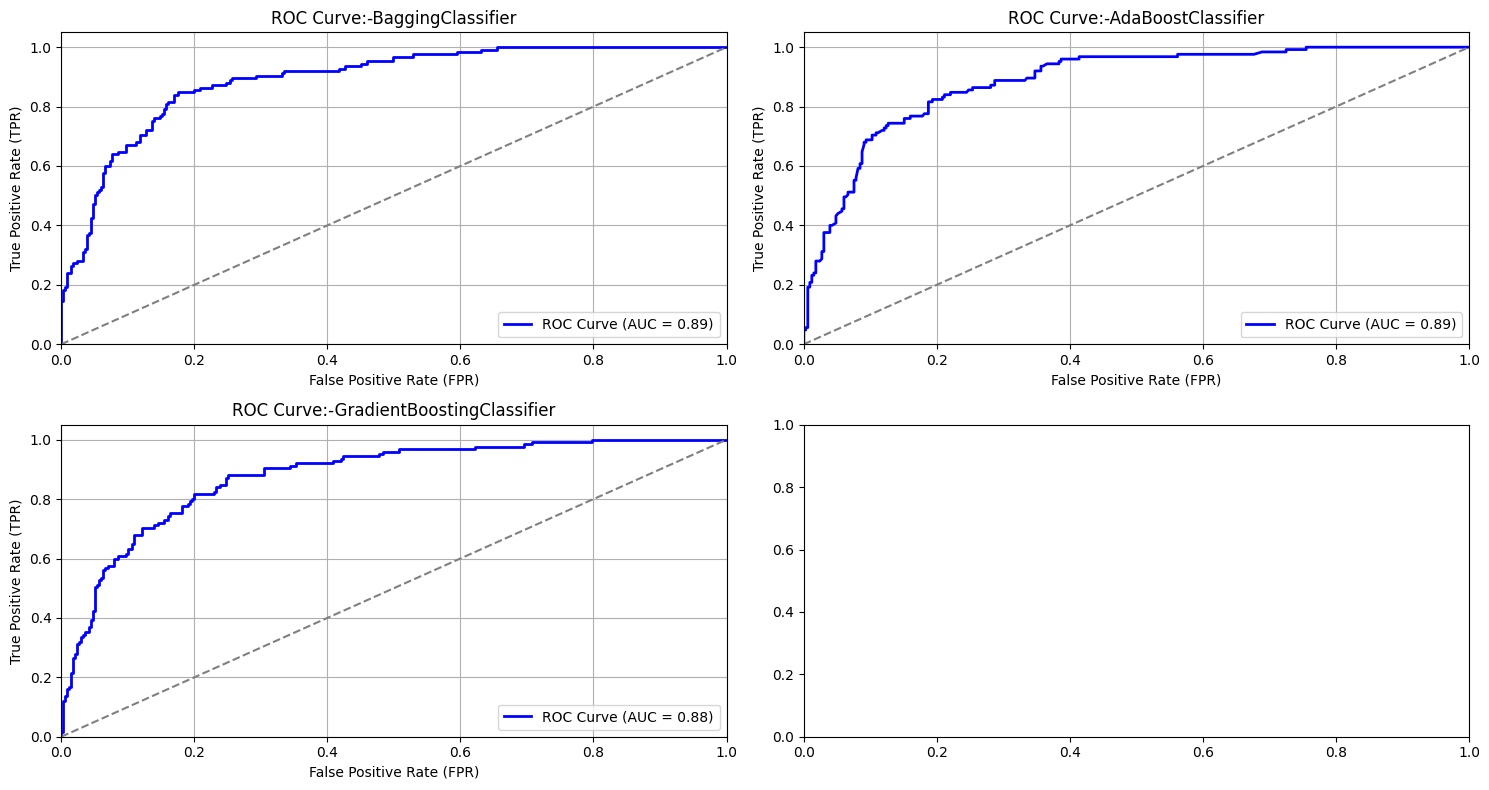

In [40]:
# Plotting all ROC curves in subplots
num_models = len(classification_models_list)
cols = 2  # Number of columns in the subplot grid
rows = int(np.ceil(num_models / cols))  # Number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, 4 * rows))

for i, model in enumerate(classification_models_list):
    row = i // cols
    col = i % cols
    ax = axes[row, col]
    if row == rows - 1 and col == cols - 1 and num_models % cols != 0:
        ax.axis('off')  # If there's an odd number of models, hide the last subplot cell
    else:
        get_roc_plots(model, X_train_scaled, y_train, X_test_scaled, y_test, ax=ax)

plt.tight_layout()
plt.savefig(images_path+'roc_auc_regularised_plots.svg')
plt.show()

In [41]:
for model in classification_models_list:
    get_model_performance_summary(model,X_train_scaled,y_train, X_test_scaled, y_test)

Model Name: BaggingClassifier
Training Data Summary:

Classification Report:
               precision    recall  f1-score   support

           0       0.73      1.00      0.84       726
           1       0.95      0.18      0.31       335

    accuracy                           0.74      1061
   macro avg       0.84      0.59      0.57      1061
weighted avg       0.80      0.74      0.67      1061


Confusion Matrix:
               Labour  Conservative
Labour           723             3
Conservative     274            61
--------------------------------------------------
Test Data Summary:

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86       331
           1       1.00      0.14      0.25       125

    accuracy                           0.77       456
   macro avg       0.88      0.57      0.56       456
weighted avg       0.82      0.77      0.69       456


Confusion Matrix:
               Labour  Conser

### Final Model Selection
#### Comparing all the models:
- Prior to Tuning, If we compare all the models based on ROC-AUC score the three best models are BaggingClassifier, AdaBoostClassifier and GradientBoostingClassifier
- Post Tuning we see that ADAClassifier has:
    - Highest AUC Score post parameter tuning along with BaggingClassifier
    - The f1 Sorces on the Training and Test are more balanced for ADAClassifier for both the classes as compaired to the BaggingClassifier and GradientBoostingClassifier
    - The BaggingClassifier does a good job in recall and precision for the "Labour Class" but very poor on recall for 'Conservative class' both on trainning and test
    - ADAClassifier does a better job in regularisation and better precision and recall mix for both classes for both Training and Test Data.
    - Lastly on the test data set the accuracy for the ADAClassifier is the highest
### Select the final model with the proper justification
- Considering all the above points we will go with the  ADAClassifier

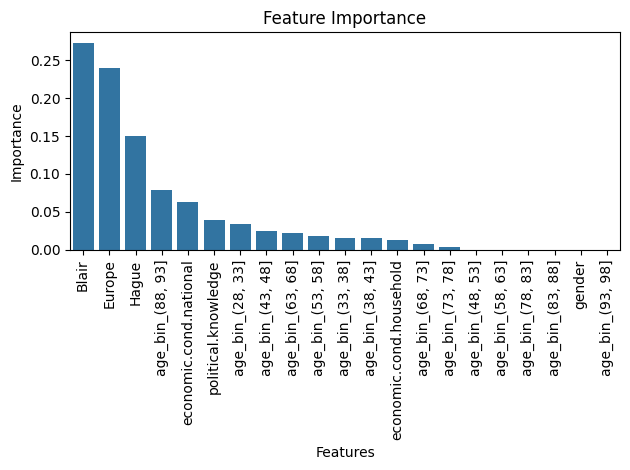

,Features,Importance
2,Blair,0.273357
4,Europe,0.240140
3,Hague,0.150707
19,"age_bin_(88, 93]",0.079071
0,economic.cond.national,0.062886
5,political.knowledge,0.038971
7,"age_bin_(28, 33]",0.034051
10,"age_bin_(43, 48]",0.025213
14,"age_bin_(63, 68]",0.022402
12,"age_bin_(53, 58]",0.018559


In [42]:
# important Features of ADABoostClassifier
feature_importance = CLM_ABC.feature_importances_
feature_names = [i for i in X_train_scaled.columns]
importance_df = pd.DataFrame({'Features': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
sns.barplot(importance_df, x='Features', y='Importance')
plt.xticks(rotation=90)
plt.title('Feature Importance')
plt.tight_layout()
plt.savefig(images_path+'Feature_importance.svg')
plt.show()
importance_df.head(10)
# Top five make-up ~80% of the features importance
# Top 10 make-up ~94% of the features importance

### Check the most important features in the final model and draw inferences
- Looking at the Top Features of the Final ADABoostClassifier these are the inferences drawn:
    - Top five make-up ~80% of the features importance
        - Blair, Europe ,Hauge, age_bin(88_93], econimic.condition.national
        - The rating/popularity of "Tony Bliar" has the highest influcence of how a voter would vote, if he is popular with the voter then the voter would vote for "Labour Party" else "Conservative".
        - The voters attitude towards the European integration is a good indicator of if the voter would vote for the "Labour Party" or "Conservative", higher Europe score would indicate that the voter is more inclinde towards "Conservative"
          - The rating/popularity of "William Hague" has a good influcence of how a voter would vote, if he is popular with the voter then the voter would vote for "Conservative Party" else "Labour".
        - Voters in the age group 88 to 92 seem to be pretty much inclined towards the conservative party, which is a expection to the other age groups, who are more "Labour party" Inclined as a propotion.
        - The last top five indicator is what the voter thinks of the "econimic.condition.national" if they feel it to be not so good they tend to favour the "Conservative Party" vs the "Labour party" and vise-versa.
    - Top 10 make-up ~94% of the features importance

### Actionable Insights & Recommendations
- Looking at all the four models (KNN, Naive Bayes, Bagging and Boosting):
    - we see that in this case the worse performing Model is the Naive Bayes which has the least impressive metrics both on Training and Test data, and we should not explore this futher.
    - KNN does a decent job but in comparision of the Ensemble techinques of Bagging and Boosting falls short espeacially when we compare the ROC Area under the Curve for it against the other two.
    - Bagging overfits the training data, but is below the Boosting method on all metrics.
    - For this data set we should go with a Boosting Model.
        - we should explore more hyper parameter tuning and other boosting models like Xgboost too and would benifit from this.
#### Key Take Aways:
- if we know the perference of the voter in terms of :
    - there views on Blair, Europe ,Hauge, and econimic.condition.national and the age of the voter.
    - we currently should be able to predict how the voter would vote with a 80% accuracy.
- we should invest more time to explore how to improve this prediction model and explore other classifiers. 

**Problem 2 Starts here**

In [43]:
!pip install nltk

In [44]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('inaugural')
from nltk.corpus import inaugural, stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
import string
from wordcloud import WordCloud
inaugural.fileids()
inaugural.raw('1941-Roosevelt.txt')
inaugural.raw('1961-Kennedy.txt')
inaugural.raw('1973-Nixon.txt')
speech_description = ['1941-Roosevelt','1961-Kennedy', '1973-Nixon.txt']
speech_list = [inaugural.raw('1941-Roosevelt.txt'),inaugural.raw('1961-Kennedy.txt'),inaugural.raw('1973-Nixon.txt')]
def display_wordcloud(wordcloud,label):
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(images_path+f'wordcloud_{label}.svg')
    plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package inaugural to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package inaugural is already up-to-date!


# Problem 2
## Problem Definition
Looking at the three speeches made "President Franklin D. Roosevelt in 1941", "President John F. Kennedy in 1961" and "President Richard Nixon in 1973", we want to run text analytics to find out what are these speaches made up of and what is the common themes between them.

## Find the number of Character, words & sentences in all three speeches
- The Number of "Characters" in "1941-Roosevelt" speech is : 7571
- The Number of "Words" in "1941-Roosevelt" speech is : 1526
- The Number of "Sentances" in "1941-Roosevelt" speech is : 68

- The Number of "Characters" in "1961-Kennedy" speech is : 7618
- The Number of "Words" in "1961-Kennedy" speech is : 1543
- The Number of "Sentances" in "1961-Kennedy" speech is : 52

- The Number of "Characters" in "1973-Nixon.txt" speech is : 9991
- The Number of "Words" in "1973-Nixon.txt" speech is : 2006
- The Number of "Sentances" in "1973-Nixon.txt" speech is : 68

For all three speeches:
- The Number of "Characters" is : 25180
- The Number of "Words" in "1961-Kennedy" speech is : 5075
- The Number of "Sentances" in "1961-Kennedy" speech is : 188

## Text cleaning
- using the stopwords and other methods provided by the nltk(natural language tool kit), we remove:
    - common words, stopwords such as e.g. 'he, she, they, us, and, the' etc
    - we also remove "punctuation" and some symbols "{'--', '``', "''"}"
    - using stemming we bring the words to they base root word.
## 3 most common words used in all three speeches:
The top three common "Words" in "1941-Roosevelt" are :
nation: 17
know: 10
peopl: 9

The top three common "Words" in "1961-Kennedy" are :
let: 16
us: 12

The top three common "Words" in "1973-Nixon.txt" are :
us: 26
let: 22
america: 21

The top three common "Words" across "All Three Speeches" are :
us: 46
nation: 40
let: 39

### Show the most common words used in all three speeches in the form of word clouds
-I have generated and displayed this for each Speech and all the three speeches below:

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kurtg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


The Number of "Characters" in "1941-Roosevelt" speech is : 7571
The Number of "Words" in "1941-Roosevelt" speech is : 1526
The Number of "Sentances" in "1941-Roosevelt" speech is : 68
The top three common "Words" in "1941-Roosevelt" are :
nation: 17
know: 10
peopl: 9
Word Cloud of in "1941-Roosevelt":


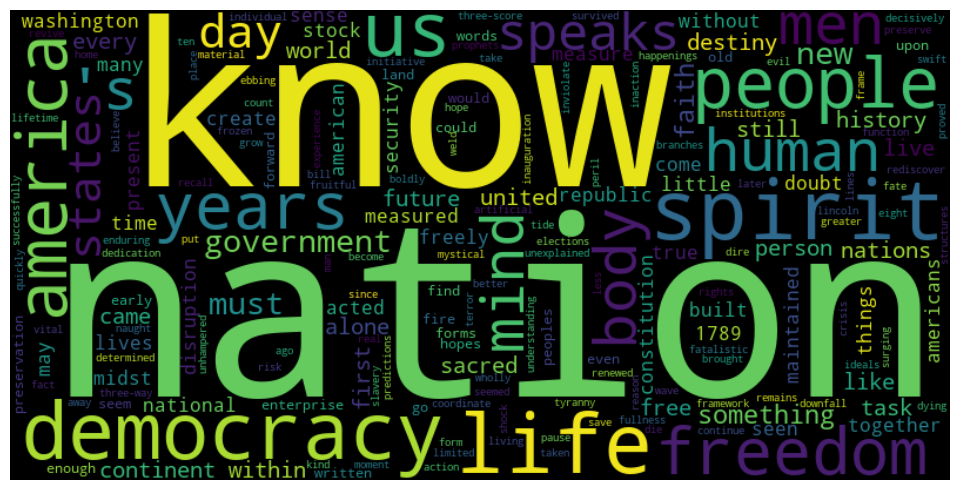

The Number of "Characters" in "1961-Kennedy" speech is : 7618
The Number of "Words" in "1961-Kennedy" speech is : 1543
The Number of "Sentances" in "1961-Kennedy" speech is : 52
The top three common "Words" in "1961-Kennedy" are :
let: 16
us: 12
power: 9
Word Cloud of in "1961-Kennedy":


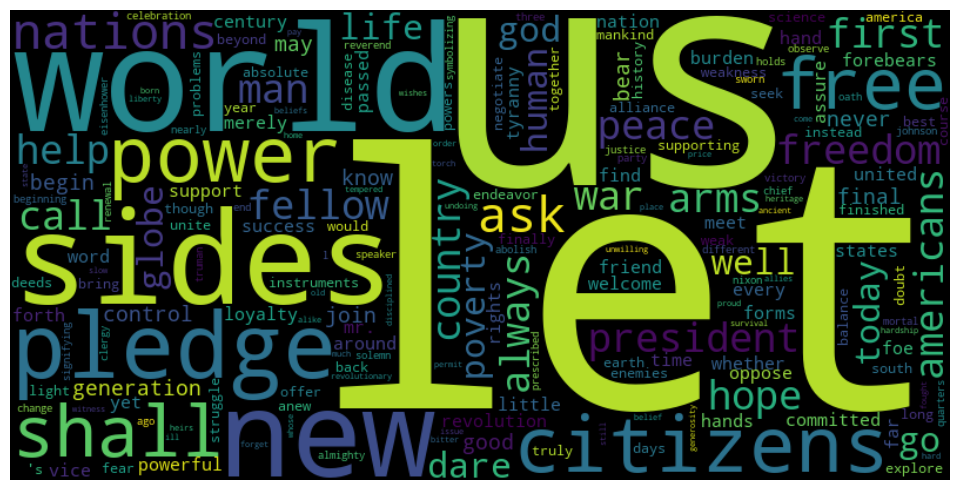

The Number of "Characters" in "1973-Nixon.txt" speech is : 9991
The Number of "Words" in "1973-Nixon.txt" speech is : 2006
The Number of "Sentances" in "1973-Nixon.txt" speech is : 68
The top three common "Words" in "1973-Nixon.txt" are :
us: 26
let: 22
america: 21
Word Cloud of in "1973-Nixon.txt":


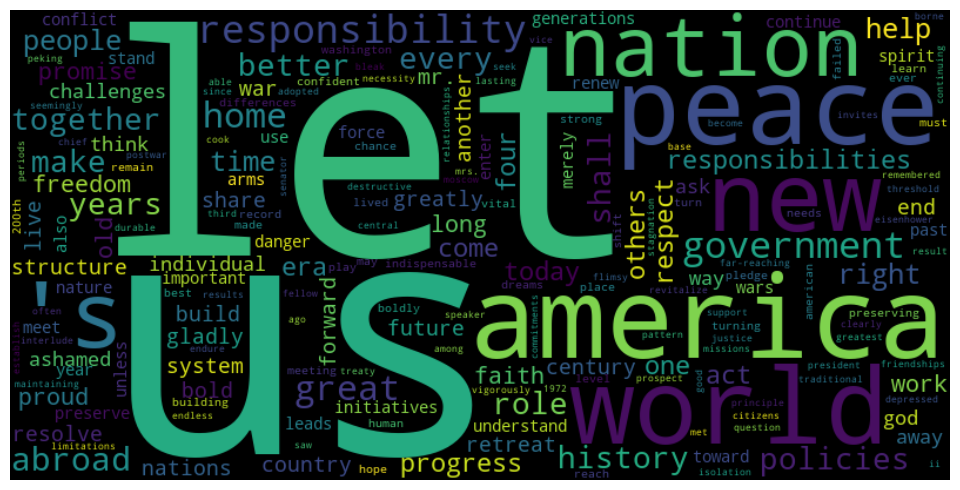

The top three common "Words" across "All Three Speeches" are :
us: 46
nation: 40
let: 39
Word Cloud of in "All Three Speeches":


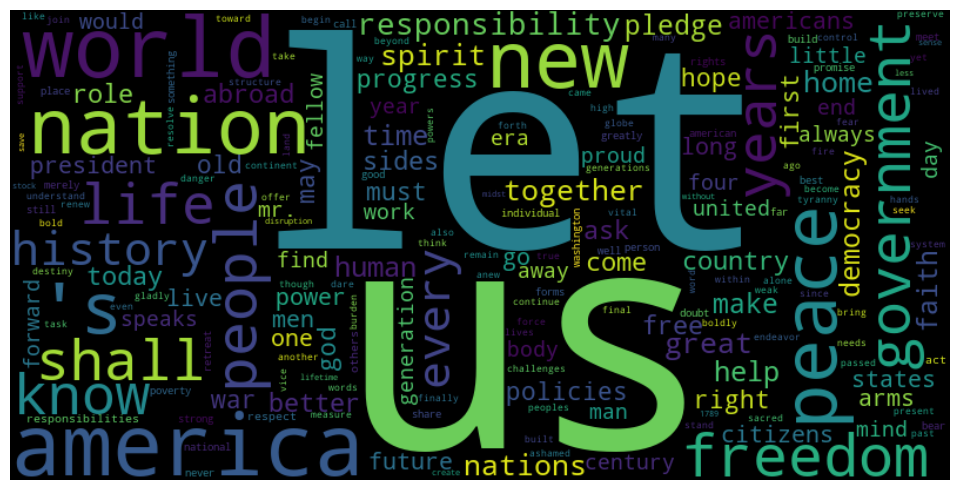

In [45]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import PorterStemmer
from nltk.probability import FreqDist
from wordcloud import WordCloud
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

speech_list_of_words_not_stemmed = []
speech_list_of_words = []
stop_words = set(stopwords.words('english'))
additional_stop_words = {'--', '``', "''"}
stop_words.update(additional_stop_words)
stemmer = PorterStemmer()

for idx, sp in enumerate(speech_list):
    print(f'The Number of "Characters" in "{speech_description[idx]}" speech is : {len(sp)}')
    words = word_tokenize(sp)
    words_lower = [word.lower() for word in words]
    filtered_words = [word for word in words_lower if word not in stop_words and word not in string.punctuation]
    stemmed_words = [stemmer.stem(word) for word in filtered_words]
    speech_list_of_words_not_stemmed.append(filtered_words)
    speech_list_of_words.append(stemmed_words)
    freq_dist_words = FreqDist(filtered_words)
    freq_dist_stemmed_words = FreqDist(stemmed_words)
    most_common_words = freq_dist_stemmed_words.most_common(3)
    word_freq_dict = dict(freq_dist_words)
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_dict)

    print(f'The Number of "Words" in "{speech_description[idx]}" speech is : {len(words)}')

    sentances = sent_tokenize(sp)
    print(f'The Number of "Sentances" in "{speech_description[idx]}" speech is : {len(sentances)}')
    print(f'The top three common "Words" in "{speech_description[idx]}" are :')
    for word, frequency in most_common_words:
        print(f'{word}: {frequency}')
    print(f'Word Cloud of in "{speech_description[idx]}":')
    display_wordcloud(wordcloud, speech_description[idx])

combine_speech_list_of_words_not_stemmed = [item for sublist in speech_list_of_words_not_stemmed for item in sublist]
combine_speech_list_of_words = [item for sublist in speech_list_of_words for item in sublist]
freq_dist_words = FreqDist(combine_speech_list_of_words_not_stemmed)
freq_dist_stemmed_words = FreqDist(combine_speech_list_of_words)
most_common_words = freq_dist_stemmed_words.most_common(3)
word_freq_dict = dict(freq_dist_words)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(word_freq_dict)
print(f'The top three common "Words" across "All Three Speeches" are :')
for word, frequency in most_common_words:
    print(f'{word}: {frequency}')
print(f'Word Cloud of in "All Three Speeches":')
display_wordcloud(wordcloud, 'all')